<a href="https://colab.research.google.com/github/ramkumarravi49/DA6401_A1/blob/main/A1_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

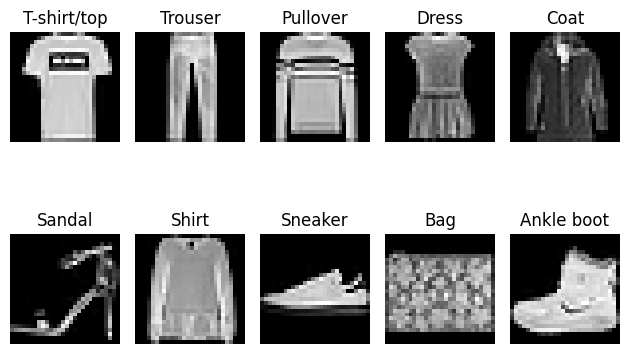

In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

(mnistf_train_x,mnistf_train_y),(mnistf_test_x,mnistf_test_y) = fashion_mnist.load_data()
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
for i in range(10):
    plt.subplot(2, 5, i + 1)
    img = mnistf_train_x[mnistf_train_y==i][0]
    plt.imshow(img,cmap='gray')
    plt.title(labels[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

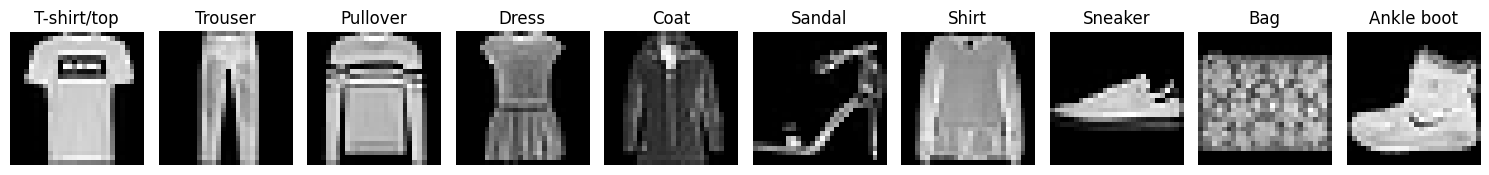

In [ ]:
import wandb
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import fashion_mnist

class FashionMNISTLoader:
    def __init__(self):
        # You can rename or change class names as needed
        self.class_names = [
            'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
            'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
        ]

    def load_data(self):
        (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

        # Normalize pixel values to [0,1]
        x_train = x_train / 255.0
        x_test = x_test / 255.0

        return x_train, y_train, x_test, y_test

class FashionMNISTVisualizer:
    def __init__(self, class_names):
        self.class_names = class_names

    def plot_samples(self, x, y):
        """
        Plots one sample from each class in a single row of subplots.
        Returns a matplotlib Figure object that can be logged to wandb.
        """
        num_classes = len(self.class_names)
        fig, axes = plt.subplots(1, num_classes, figsize=(15, 3))

        for i in range(num_classes):
            # Find the first index in y where the label is i
            idx = np.where(y == i)[0][0]
            axes[i].imshow(x[idx], cmap='gray')
            axes[i].set_title(self.class_names[i])
            axes[i].axis('off')

        plt.tight_layout()
        return fig

class WandbLogger:
    def __init__(self, project, run_name):
        wandb.login()
        self.run = wandb.init(project=project, name=run_name)

    def log_image(self, plt_obj, key="Question 1"):
        """
        Logs the given Matplotlib figure (plt_obj) as an image to wandb
        under the specified key.
        """
        wandb.log({key: wandb.Image(plt_obj)})

    def finish(self):
        wandb.finish()

def main():
    # 1. Load data
    data_loader = FashionMNISTLoader()
    x_train, y_train, x_test, y_test = data_loader.load_data()

    # 2. Create a visualizer and plot one sample image per class
    visualizer = FashionMNISTVisualizer(data_loader.class_names)
    plot_obj = visualizer.plot_samples(x_train, y_train)

    # 3. Initialize wandb logger
    logger = WandbLogger(
        project="cs24m037-iit-madras",
        run_name="Q1"
    )

    # 4. Log the image to wandb
    logger.log_image(plot_obj)

    # 5. Show the plot locally (optional)
    plt.show()

    # 6. Finish the wandb run
    logger.finish()

if __name__ == "__main__":
    main()
